In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
import emoji

### Preparing Data

In [0]:
df1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Emojify_Dataset/train_emoji.csv')

In [8]:
df1.head()

,Text,Labels,Unnamed: 2,Unnamed: 3
0,I am proud of your achievements,2,NaN,NaN
1,It is the worst day in my life,3,NaN,NaN
2,Miss you so much,0,NaN,[0]
3,food is life,4,NaN,NaN
4,I love you mum,0,NaN,NaN


In [9]:
df1.shape

(132, 4)

In [10]:
df1['Labels'].value_counts()

2    38
3    36
0    22
1    19
4    17
Name: Labels, dtype: int64

In [0]:
df2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Emojify_Dataset/emojify_data.csv')

In [12]:
df2.head()

,Text,Labels,Unnamed: 2,Unnamed: 3
0,work is horrible,3,NaN,NaN
1,I am upset,3,NaN,[3]
2,throw the ball,1,NaN,[2]
3,Good joke,2,NaN,NaN
4,what is your favorite baseball game,1,NaN,NaN


In [13]:
df2['Labels'].value_counts()

2    56
3    52
0    33
4    23
1    19
Name: Labels, dtype: int64

In [14]:
df2.shape

(183, 4)

In [0]:
train_df=pd.concat([df1,df2],ignore_index=True)

In [16]:
train_df

,Text,Labels,Unnamed: 2,Unnamed: 3
0,I am proud of your achievements,2,NaN,NaN
1,It is the worst day in my life,3,NaN,NaN
2,Miss you so much,0,NaN,[0]
3,food is life,4,NaN,NaN
4,I love you mum,0,NaN,NaN
...,...,...,...,...
310,dance with me,2,NaN,NaN
311,she is a bully,3,NaN,NaN
312,she plays baseball,1,NaN,NaN
313,I like it when people smile,2,NaN,NaN


In [0]:
test_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Emojify_Dataset/test_emoji.csv')

In [18]:
test_df.head()

,Text,Unnamed: 1,Labels
0,he did not answer,NaN,3
1,he got a raise,NaN,2
2,she got me a present,NaN,0
3,ha ha ha it was so funny,NaN,2
4,he is a good friend,NaN,0


### Preparing Training and Testing Data

In [0]:
x_train=train_df['Text']

In [0]:
x_test=test_df['Text']

In [0]:
y_train=train_df['Labels']

In [22]:
y_train.value_counts()

2    94
3    88
0    55
4    40
1    38
Name: Labels, dtype: int64

In [0]:
y_test=test_df['Labels']

In [24]:
y_test.value_counts()

2    18
3    15
0    12
4     6
1     5
Name: Labels, dtype: int64

### Changing Target Variable to categorical

In [0]:
y_train_categorical=ku.to_categorical(y_train,num_classes=5)

In [0]:
y_test_categorical=ku.to_categorical(y_test,num_classes=5)

### Tokenizing And Text Preprocessing

In [0]:
tokenizer=Tokenizer()

In [0]:
tokenizer.fit_on_texts(x_train)

In [29]:
word_index=tokenizer.word_index
word_index

{'a': 5,
 'acceptance': 109,
 'achievements': 104,
 'adorable': 189,
 'adore': 151,
 'after': 133,
 'afternoon': 236,
 'again': 58,
 'algorithm': 115,
 'all': 279,
 'alone': 165,
 'always': 237,
 'am': 6,
 'amazing': 188,
 'an': 187,
 'and': 60,
 'announcement': 184,
 'answer': 86,
 'any': 301,
 'anything': 206,
 'approved': 118,
 'are': 10,
 'around': 269,
 'ask': 138,
 'assignment': 110,
 'at': 39,
 'attractive': 140,
 'away': 305,
 'awesome': 257,
 'awful': 168,
 'baby': 95,
 'back': 283,
 'bad': 41,
 'ball': 54,
 'base': 229,
 'baseball': 29,
 'be': 289,
 'best': 171,
 'birthday': 308,
 'boiled': 299,
 'boring': 316,
 'bravo': 81,
 'break': 304,
 'breakfast': 311,
 'breaks': 296,
 'brighten': 317,
 'brunch': 135,
 'bullshit': 108,
 'bully': 318,
 'but': 154,
 'by': 79,
 'cake': 233,
 'can': 97,
 'cancelled': 276,
 'candy': 128,
 'cannot': 197,
 'catcher': 226,
 'celebrate': 123,
 'charming': 183,
 'cheese': 232,
 'chicago': 129,
 'chinese': 181,
 'code': 153,
 'come': 198,
 'coming

In [30]:
vocab_size=len(word_index)+1
vocab_size

319

In [0]:
train_sequence=tokenizer.texts_to_sequences(x_train)
train_padded=pad_sequences(train_sequence,maxlen=10)

In [0]:
test_sequence=tokenizer.texts_to_sequences(x_test)
test_padded=pad_sequences(test_sequence,maxlen=10)

### Globe Embedding

In [33]:
# This is the 100 dimension version of GloVe from Stanford
# I am using a api for faster access
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size,100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-04-30 19:28:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  98.4MB/s    in 3.4s    

2020-04-30 19:28:39 (98.4 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



### Building Model and Testing Accuracy


#### Single Layer Bidirectional LSTM


In [0]:
model1=Sequential()

In [0]:
model1.add(Embedding(vocab_size,100,input_length=10,weights=[embeddings_matrix],trainable=False))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(32)))
model1.add(Dense(5,activation='softmax'))

In [36]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           31900     
_________________________________________________________________
dropout (Dropout)            (None, 10, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                34048     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 66,273
Trainable params: 34,373
Non-trainable params: 31,900
_________________________________________________________________


In [0]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
history=model1.fit(train_padded,y_train_categorical,epochs=30,validation_data=(test_padded,y_test_categorical))

Epoch 1/30
10/10 [==============================] - 1s 80ms/step - loss: 1.5601 - accuracy: 0.2508 - val_loss: 1.5069 - val_accuracy: 0.3036
Epoch 2/30
10/10 [==============================] - 0s 8ms/step - loss: 1.4476 - accuracy: 0.3651 - val_loss: 1.4229 - val_accuracy: 0.4286
Epoch 3/30
10/10 [==============================] - 0s 8ms/step - loss: 1.3752 - accuracy: 0.4444 - val_loss: 1.3524 - val_accuracy: 0.5000
Epoch 4/30
10/10 [==============================] - 0s 8ms/step - loss: 1.2860 - accuracy: 0.5206 - val_loss: 1.2763 - val_accuracy: 0.5357
Epoch 5/30
10/10 [==============================] - 0s 8ms/step - loss: 1.1871 - accuracy: 0.6222 - val_loss: 1.1829 - val_accuracy: 0.6250
Epoch 6/30
10/10 [==============================] - 0s 8ms/step - loss: 1.0817 - accuracy: 0.6508 - val_loss: 1.0812 - val_accuracy: 0.6071
Epoch 7/30
10/10 [==============================] - 0s 9ms/step - loss: 0.9449 - accuracy: 0.7206 - val_loss: 0.9885 - val_accuracy: 0.6250
Epoch 8/30
10/10 [=

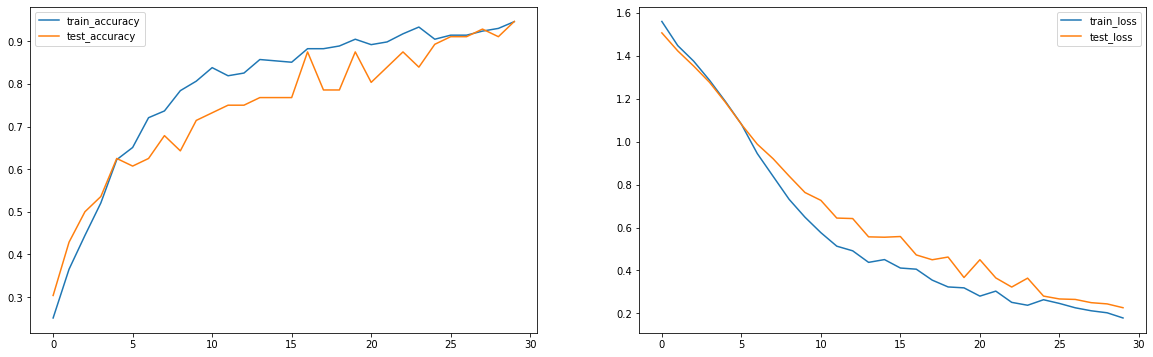

In [39]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()

### Multi layer Bidirectional LSTM

In [0]:
model2=Sequential()

In [0]:
model2.add(Embedding(vocab_size,100,input_length=10,weights=[embeddings_matrix],trainable=False))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(128,return_sequences=True)))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(128)))
model2.add(Dense(5,activation='softmax'))

In [61]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           31900     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 10, 256)           234496    
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 661,921
Trainable params: 630,021
Non-trainable params: 31,900
___________________________________________

In [0]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
history=model2.fit(train_padded,y_train_categorical,epochs=50,validation_data=(test_padded,y_test_categorical))

Epoch 1/50
10/10 [==============================] - 1s 120ms/step - loss: 1.5362 - accuracy: 0.2444 - val_loss: 1.4019 - val_accuracy: 0.3571
Epoch 2/50
10/10 [==============================] - 0s 13ms/step - loss: 1.3006 - accuracy: 0.5143 - val_loss: 1.1530 - val_accuracy: 0.5893
Epoch 3/50
10/10 [==============================] - 0s 12ms/step - loss: 0.9309 - accuracy: 0.6730 - val_loss: 0.9855 - val_accuracy: 0.5357
Epoch 4/50
10/10 [==============================] - 0s 31ms/step - loss: 0.7069 - accuracy: 0.7397 - val_loss: 0.6746 - val_accuracy: 0.6964
Epoch 5/50
10/10 [==============================] - 0s 12ms/step - loss: 0.4872 - accuracy: 0.8190 - val_loss: 0.5136 - val_accuracy: 0.8036
Epoch 6/50
10/10 [==============================] - 0s 12ms/step - loss: 0.4177 - accuracy: 0.8444 - val_loss: 0.5344 - val_accuracy: 0.7679
Epoch 7/50
10/10 [==============================] - 0s 12ms/step - loss: 0.5374 - accuracy: 0.8000 - val_loss: 0.6254 - val_accuracy: 0.7500
Epoch 8/50
1

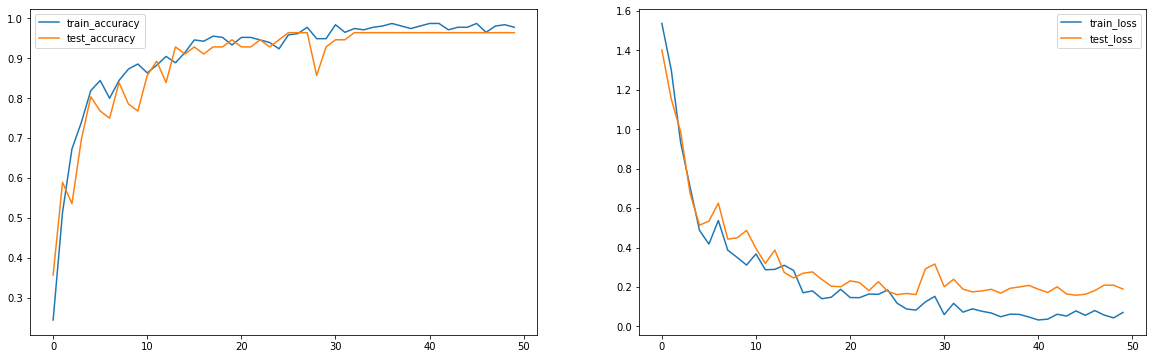

In [64]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()

### Multilayer Bidirectional LSTM is a better model and gives a good accuracy of 96%

In [0]:
prediction=model2.predict_classes(test_padded)

In [66]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00         5
           2       0.95      1.00      0.97        18
           3       0.93      0.93      0.93        15
           4       1.00      1.00      1.00         6

    accuracy                           0.96        56
   macro avg       0.98      0.97      0.97        56
weighted avg       0.97      0.96      0.96        56



In [67]:
confusion_matrix(y_test,prediction)

array([[11,  0,  0,  1,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0, 18,  0,  0],
       [ 0,  0,  1, 14,  0],
       [ 0,  0,  0,  0,  6]])

### Predicting With some new values

In [0]:
emoji_dict={0:['heart',':heart:'],1:['baseball',':baseball:'],2:['smile',':smile:'],3:['disappoined',':disappointed:'],4:['fork and knife',':fork_and_knife:']}

In [69]:
text=x_test[8]
text

'Stop making this joke ha ha ha'

In [70]:
y_test[8]

2

In [0]:
def predict(text):
  text_sequence=tokenizer.texts_to_sequences([text])
  text_padded=pad_sequences(text_sequence,maxlen=30)
  prediction=model2.predict_classes(text_padded)
  x=prediction[0]
  print(emoji_dict[x][0])
  print(emoji.emojize(emoji_dict[x][1], use_aliases=True))

In [72]:
ans=predict(text)
ans

smile
😄


### Predicting New Values

In [73]:
msg='you brighten my day'
ans=predict(msg)
ans

smile
😄


In [74]:
msg='she got me a nice present'
ans=predict(msg)
ans

heart
❤


In [75]:
msg='This girl is messing with me'
ans=predict(msg)
ans

disappoined
😞


In [76]:
msg='will you be my valentine'
ans=predict(msg)
ans

heart
❤


In [77]:
msg='Honey lets go out for a date'
ans=predict(msg)
ans

fork and knife
🍴
